In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier (n_estimators=5, random_state=2) #number of estimators=5, construct 5 trees
forest.fit (X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

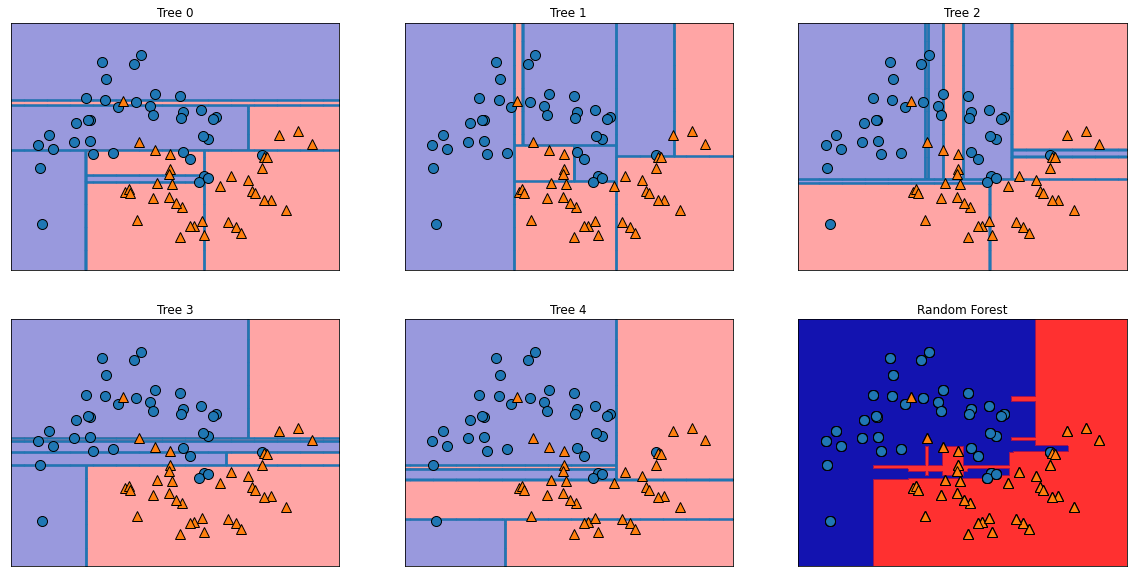

In [10]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots (2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter (X_train[:, 0], X_train[:, 1], y_train)

In [13]:
# 100 trees on the Breast Cancer datas
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier (n_estimators=100, random_state=0)
forest.fit (X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score (X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score (X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


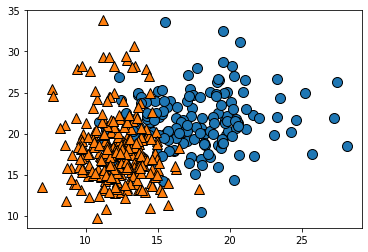

In [14]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

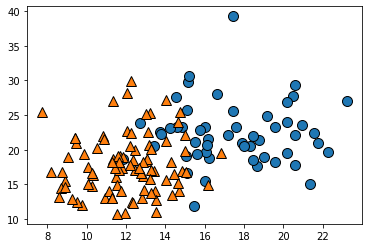

In [15]:
mglearn.discrete_scatter(X_test[:,0],X_test[:,1], y_test)

In [16]:
pip install pydot

In [23]:
# Pandas is used for data manupulation
import pandas as pd #regression, there is continuous numbers

features = pd.read_csv('X:/temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [24]:
print('THe shape of our features is:', features.shape)

THe shape of our features is: (348, 12)


In [25]:
#Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [26]:
features=pd.get_dummies(features)

features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [27]:
import numpy as np
# Labels are the values we want to predict 
labels = np.array(features['actual'])
# Remove the Labels from the features 
# axis 1 refers to the columns 
features= features.drop('actual', axis = 1) 
# Saving feature names for later use 
feature_list = list(features.columns)
# Convert to numpy array 
features = np.array(features) 

In [28]:
 # Using Skicit-Learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets 
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features. shape) 
print('Training Labels Shape:', train_labels.shape) 
print('Testing Features Shape:', test_features. shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [29]:
baseline_preds = test_features[:,feature_list.index('average')]

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors),2))

Average baseline error:  5.06


In [33]:
# Import the model we are using

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data

rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data

predictions = rf.predict(test_features)

# Calculate the absolute errors

errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [34]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


In [36]:
 # Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import pydotplus
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('x:/tree.png')

In [38]:
#choosing the features
#get numerical feature importances

importances = list(rf.feature_importances_)

#round off the numbers of features
feature_importances = [(feature,round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#sort importance
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse = True)

#choose the top 3 importances

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [40]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest

rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error

predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))

accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


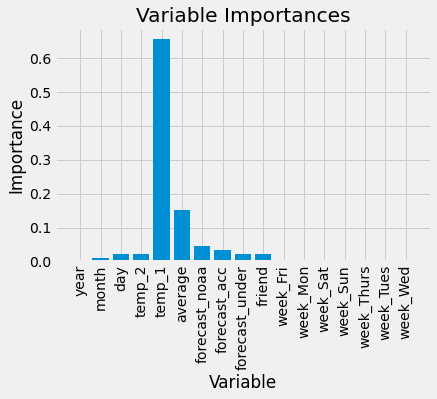

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# List of x Locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick Labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis Labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');